In [1]:
# define the library
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Bu ödevde melbourne konut piyasası datasetini inceleyeceğim.
Dataset çok büyük olduğu için eksik verileri doldurmak yerine direkt sildim. Bu işlem normal şartlarda yapılmamalıdır çünkü bizi doğru yoldan saptırabilir fakat daha küçük bi veri setiyle çalışıyormuşuz gibi düşünelim ve yola devam edelim. (Ayrıca datasetten sadece bazı numerik verileri çekerek inceleme yaptım)

Öncelikle derste yaptığımız gibi simple regression deneyeceğim daha sonra multiple linear regression yapmaya çalışacağım.

In [2]:
melbourne = pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
melbourne.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
print(f'Shape     : {melbourne.shape}\n'
      f'Size      : {melbourne.size}\n'
      f'Dimension : {melbourne.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [6]:
melbourne.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [8]:
df = melbourne[["Rooms", "Bedroom2", "Bathroom", "Distance", "Price"]]

In [ ]:
# Adding feature for house age
df['Age'] = 2024 - melbourne['YearBuilt']
df.drop(df.loc[df["Age"] < 0].index, inplace=True)

In [111]:
df.head()

,Rooms,Bedroom2,Bathroom,Distance,Price,Age
0,2,2.0,1.0,2.5,NaN,NaN
1,2,2.0,1.0,2.5,1480000.0,NaN
2,2,2.0,1.0,2.5,1035000.0,124.0
3,3,3.0,2.0,2.5,NaN,NaN
4,3,3.0,2.0,2.5,1465000.0,124.0


In [112]:
df.isnull().sum()

Rooms           0
Bedroom2     8217
Bathroom     8226
Distance        1
Price        7609
Age         19306
dtype: int64

In [116]:
df = df.dropna()
# delete the missing value

In [117]:
df.isnull().sum()

Rooms       0
Bedroom2    0
Bathroom    0
Distance    0
Price       0
Age         0
dtype: int64

In [118]:
df.columns

Index(['Rooms', 'Bedroom2', 'Bathroom', 'Distance', 'Price', 'Age'], dtype='object')

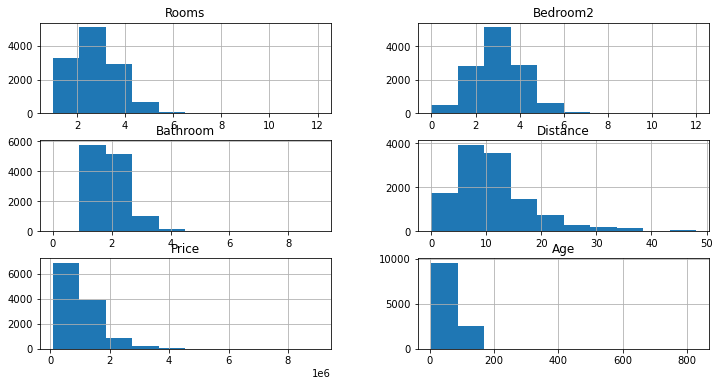

In [119]:
plt.rcParams['figure.figsize'] = (12,6)

viz = df[['Rooms', 'Bedroom2', 'Bathroom', 'Distance', 'Price', 'Age']]
viz.hist()
plt.show()

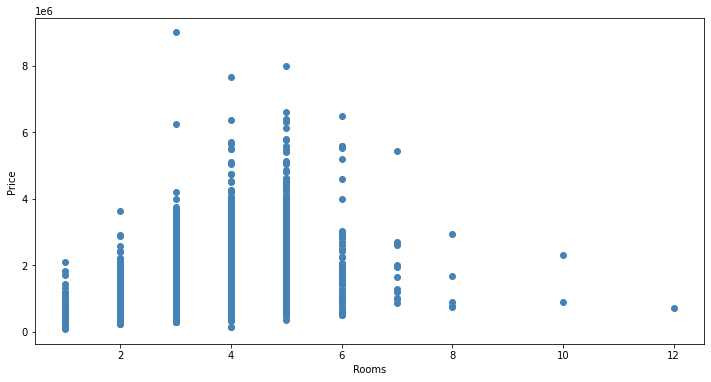

In [120]:
plt.scatter(df.Rooms, df.Price, color="steelblue")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

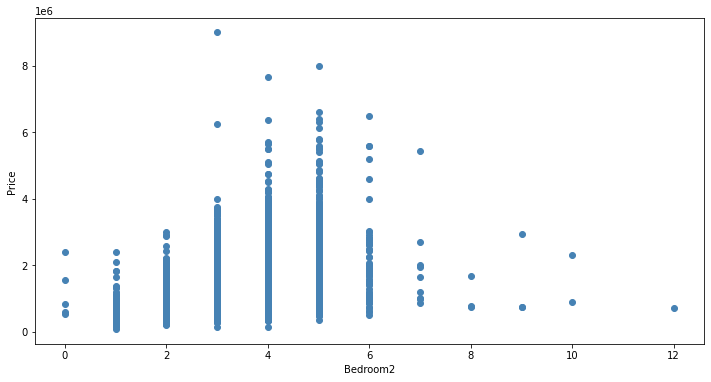

In [121]:
plt.scatter(df.Bedroom2, df.Price, color="steelblue")
plt.xlabel("Bedroom2")
plt.ylabel("Price")
plt.show()

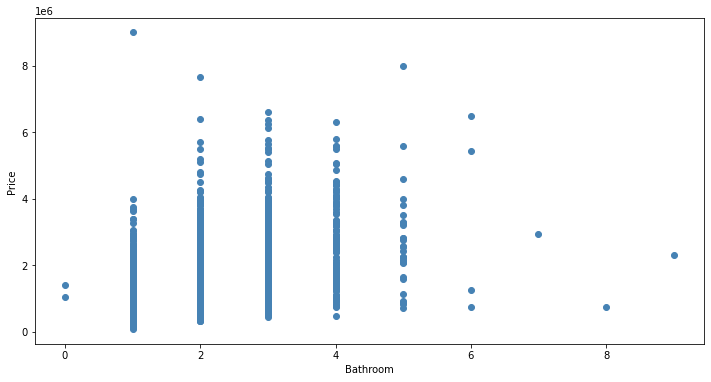

In [122]:
plt.scatter(df.Bathroom, df.Price, color="steelblue")
plt.xlabel("Bathroom")
plt.ylabel("Price")
plt.show()

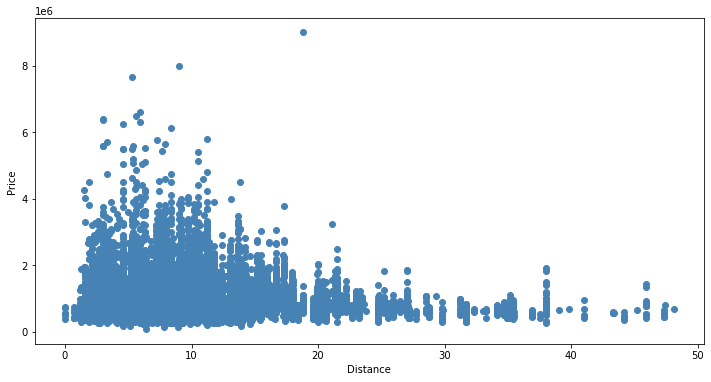

In [123]:
plt.scatter(df.Distance, df.Price, color="steelblue")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.show()

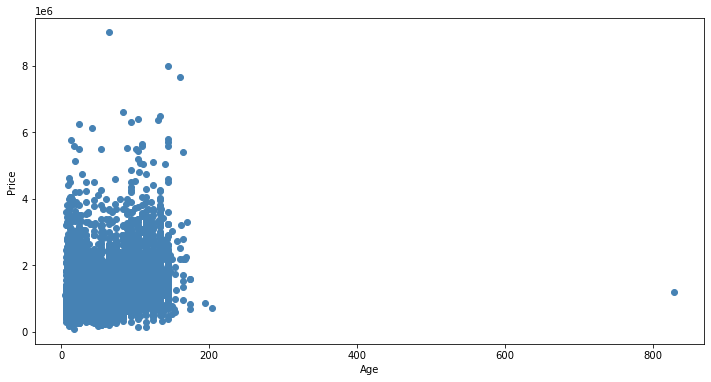

In [124]:
plt.scatter(df.Age, df.Price, color="steelblue")
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Price'>

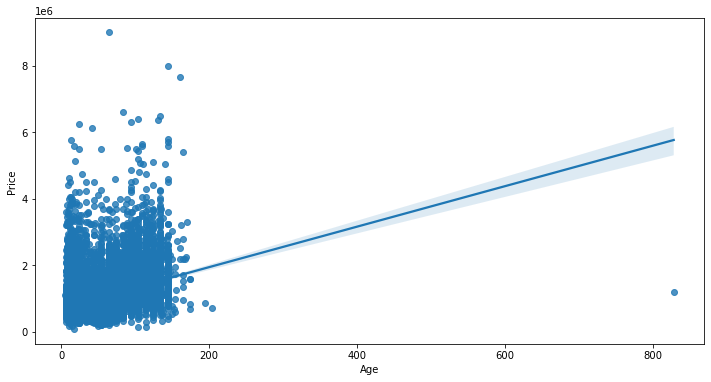

In [125]:
sns.regplot(x=df['Age'], y=df['Price'])

In [126]:
#testing-training diye ayırdım %25-%75 olarak
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

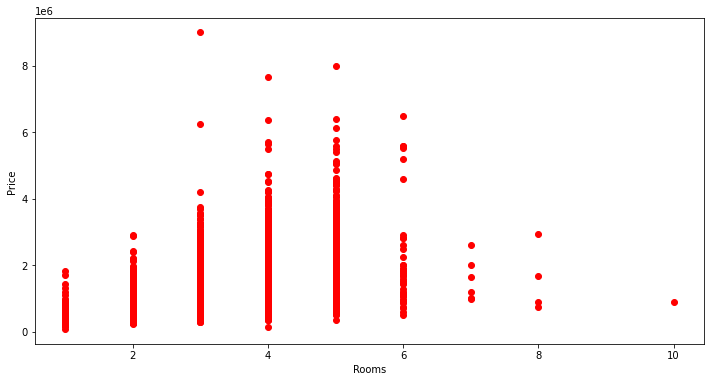

In [127]:
plt.scatter(train.Rooms, train.Price, color="red")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

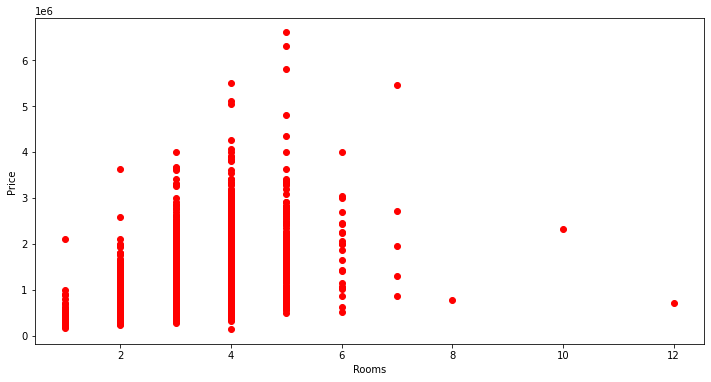

In [128]:
plt.scatter(test.Rooms, test.Price, color="red")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

In [129]:

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Rooms']])
train_y = np.asanyarray(train[['Price']])

regr.fit(train_x, train_y)

LinearRegression()

In [130]:
print(regr.coef_) # θ1
print(regr.intercept_) # θ0

[[340885.79314974]]
[32321.11095863]


Text(0, 0.5, 'Price')

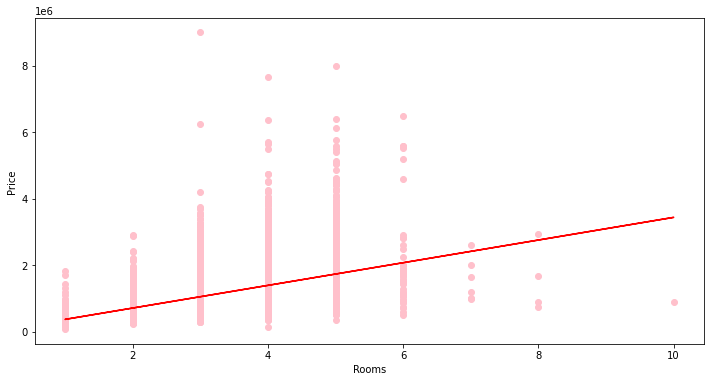

In [131]:
plt.scatter(train.Rooms, train.Price, color="pink")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Rooms")
plt.ylabel("Price")

Model evaluation metrics:

In [132]:
test_x = np.asanyarray(test[['Rooms']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

In [136]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 409320.77
Residual sum of squares (MSE): 343024599963.44
R2-score: 0.21


Simple regression result:

* Mean absolute error: 409320.77
* Residual sum of squares (MSE): 343024599963.44
* R2-score: 0.21

## MULTIPLE LINEAR REGRESSION 

In [137]:
df.head()

,Rooms,Bedroom2,Bathroom,Distance,Price,Age
2,2,2.0,1.0,2.5,1035000.0,124.0
4,3,3.0,2.0,2.5,1465000.0,124.0
6,4,3.0,1.0,2.5,1600000.0,10.0
11,3,4.0,2.0,2.5,1876000.0,114.0
14,2,2.0,1.0,2.5,1636000.0,134.0


In [138]:
df.columns

Index(['Rooms', 'Bedroom2', 'Bathroom', 'Distance', 'Price', 'Age'], dtype='object')

In [140]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Rooms', 'Bathroom', 'Age']])
y = np.asanyarray(train[['Price']])

regr.fit(x, y)

LinearRegression()

In [141]:
print('Coefficients:', regr.coef_)

Coefficients: [[164016.54255491 388871.12346185   7289.40777537]]


In [142]:
# Prediction

y_hat = regr.predict(np.asanyarray(test[['Rooms', 'Bathroom',  'Age']]))
x = np.asanyarray(test[['Rooms', 'Bathroom', 'Age']])
y = np.asanyarray(test[['Price']])

print("Mean Squared Error (MSE) : %.5f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.5f' % regr.score(x, y)) 

Mean Squared Error (MSE) : 250825788885.67697
Variance score: 0.42072


In [143]:
# Doğrusal regresyon modeli oluştudum
regr = linear_model.LinearRegression()

# Train verileri
x_train = np.asanyarray(train[['Rooms', 'Bathroom', 'Age']])
y_train = np.asanyarray(train[['Price']])

# Modeli eğitme
regr.fit(x_train, y_train)


LinearRegression()

In [144]:
print('Coefficients:', regr.coef_)

Coefficients: [[164016.54255491 388871.12346185   7289.40777537]]


In [145]:
# Test verileri üzerinde tahmin yapma
x_test = np.asanyarray(test[['Rooms', 'Bathroom', 'Age']])
y_test = np.asanyarray(test[['Price']])

y_ = regr.predict(x_test)


In [146]:
# MSE hesapla
mse = mean_squared_error(y_test, y_)
print("Ortalama Hata Kare (MSE): %.5f" % mse)

# R-kare değerini hesapla
r2 = regr.score(x_test, y_test)
print('R-kare değeri: %.5f' % r2)

Ortalama Hata Kare (MSE): 250825788885.67697
R-kare değeri: 0.42072


In [147]:
# Bu şekilde de hesaplayabiliriz, üstteki daha güzel duruyor ama
print("Mean Squared Error (MSE): %.5f"% np.mean((y_ - y) ** 2))
print('Variance score: %.5f' % regr.score(x, y))

Mean Squared Error (MSE): 250825788885.67697
Variance score: 0.42072


Mean Square Error :

* Daha düşük bir MSE, daha iyi bir tahmin performansını gösterir.
* MSE, ölçeğe bağlıdır, yani değeri hedef değişkenin ölçeğine bağlıdır. Bu nedenle, genellikle MSE'yi farklı modeller veya veri setleri arasında karşılaştırma yspmak için  daha kullanışlıdır.



